# Value At Risk (위험 가치)

Value At Risk (VaR) 또는 "위험 가치"는 투자 포트폴리오에서 **일정 기간 동안 발생할 수 있는 최대 예상 손실**을 측정하는 데 사용되는 금융 위험 관리 도구입니다. VaR은 주어진 확률과 시간 기간에 대한 손실의 최대 금액을 나타냅니다.

예를 들어, 1일 VaR이 1백만 달러, 5%라고 한다면, 이는 하루에 1백만 달러 이상 손실이 발생할 확률이 5%라는 의미입니다. 다시 말해, 100일 중 약 5일 동안 투자자는 1백만 달러 이상 손실을 볼 수 있다는 것을 예상할 수 있습니다.

- VaR은 일반적으로 세 가지 요소를 고려하여 계산됩니다:  
1. 확률 또는 신뢰 수준(Confidence level): 손실이 예상치를 초과할 확률.  
2. 시간 기간(Time horizon): VaR 측정치를 기반으로 하는 기간.  
3. 손실 금액(Loss amount): 주어진 확률과 시간 기간 동안 손실될 수 있는 금액.  

VaR은 자산, 포트폴리오, 회사 또는 금융 기관의 위험을 측정하고 이해하는 데 유용한 도구이지만, 극단적인 이벤트(즉, "꼬리" 위험)를 잘 포착하지 못하는 한계가 있습니다. 따라서 VaR은 종종 다른 위험 관리 지표와 함께 사용됩니다.

### 특정 주식의 로그 수익률 분포

- histogram 으로 확인하면 normal distribution 에 매우 가깝게 나타난다.
- Mean(mu), variance(sigma) 를 historic data 로부터 추정

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import FinanceDataReader as fdr
import korean

# ticker = 'AAPL'  
# ticker_name = "Apple"

ticker = '086520'  
ticker_name = "Echo Pro"

In [27]:
df = fdr.DataReader(ticker, start="2020-01-01")
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,2918,2969,2853,2957,2941870,0.017550
2020-01-03,2950,2950,2879,2912,2092980,-0.015218
2020-01-06,2827,2975,2801,2944,3307245,0.010989
2020-01-07,2931,2995,2892,2899,1961025,-0.015285
2020-01-08,2879,2899,2763,2783,3402040,-0.040014


- 로그 수익률 계산

In [28]:
# 로그 수익률(Log Return) 계산
# 'Close' 열의 현재 값과 이전 값의 로그 차이를 계산하여 'LogReturn' 열에 저장합니다.
# np.log(df['Close'])는 현재 종가의 로그 값을 계산하고,
# np.log(df['Close'].shift(1))은 이전 종가의 로그 값을 계산합니다.
df['LogReturn'] = np.log(df['Close']) - np.log(df['Close'].shift(1))

df.head()

,Open,High,Low,Close,Volume,Change,LogReturn
Date,,,,,,,
2020-01-02,2918,2969,2853,2957,2941870,0.017550,NaN
2020-01-03,2950,2950,2879,2912,2092980,-0.015218,-0.015335
2020-01-06,2827,2975,2801,2944,3307245,0.010989,0.010929
2020-01-07,2931,2995,2892,2899,1961025,-0.015285,-0.015403
2020-01-08,2879,2899,2763,2783,3402040,-0.040014,-0.040836


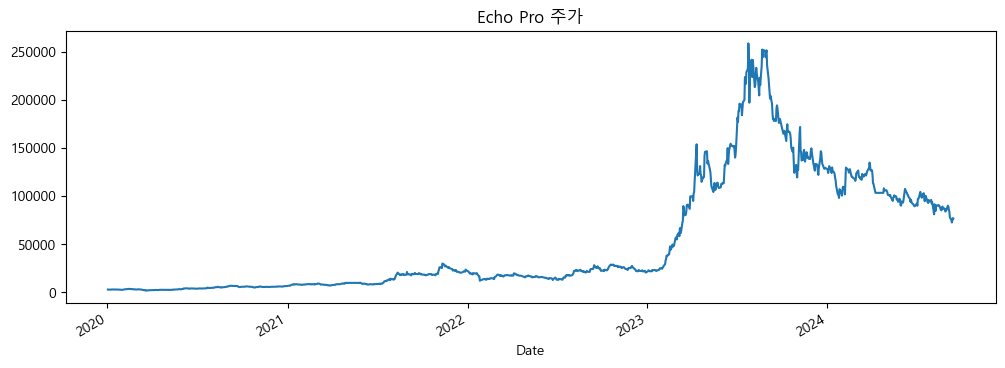

In [29]:
df['Close'].plot(figsize=(12, 4), title=f"{ticker_name} 주가")
plt.show()

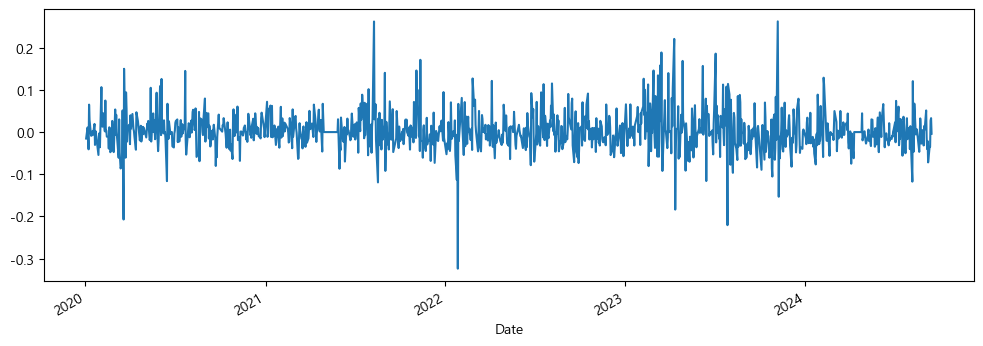

In [30]:
df['LogReturn'].plot(figsize=(12, 4))
None

- 로그 수익률의 평균, 표준편차 계산  

표본 표준편차의 경우 공식에서 `n – 1` (ddof=1)을 사용합니다. n을 사용하면 변동성을 일관되게 과소평가하는 편향된 추정치를 얻을 수 있기 때문입니다. 표본 표준 편차는 모집단의 실제 표준 편차보다 낮은 경향이 있습니다.  
표본 n을 n – 1로 줄이면 표준 편차가 인위적으로 커지므로 보수적인 변동성 추정치를 얻을 수 있습니다.

In [21]:
mu = df['LogReturn'].mean()  # 로그 수익률의 평균
sigma = df['LogReturn'].std(ddof=1)  # 로그 수익률의 표준 편차 (표본 표준 편차)

# 계산된 평균과 표준 편차를 출력합니다.
# mu는 평균 수익률, sigma는 수익률의 변동성을 나타냅니다.
print(f"{ticker_name}의 일일 수익률 평균은 {mu:.5f} 이고, 표준 편차는 {sigma: .5f}이다")

Echo Pro의 일일 수익률 평균은 0.00281 이고, 표준 편차는  0.04545이다


### 수익률 분포 시각화

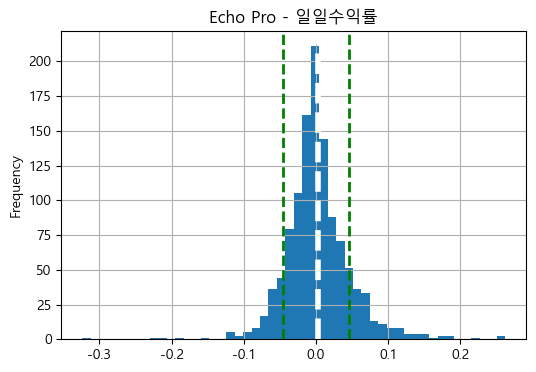

In [35]:
# 로그 수익률의 히스토그램을 생성합니다.
# 'LogReturn' 열의 데이터를 히스토그램으로 플로팅하며, 50개의 구간(bins)으로 나눕니다.
df['LogReturn'].plot(kind='hist', bins=50, figsize=(6, 4))

# 수직선으로 평균을 표시합니다.
plt.axvline(mu, color='w', linestyle='dashed', linewidth=4)  # 평균(흰색 점선)

# 수직선으로 표준 편차를 표시합니다.
plt.axvline(sigma, color='g', linestyle='dashed', linewidth=2)  # 양의 표준 편차(녹색 점선)
plt.axvline(-sigma, color='g', linestyle='dashed', linewidth=2)  # 음의 표준 편차(녹색 점선)

plt.title(f"{ticker_name} - 일일수익률")
plt.grid()

### 확률밀도함수(probability density function) 시각화
- 확률밀도 함수의 95% 신뢰구간 시각화

In [37]:
# 정규 분포의 확률 밀도 함수를 계산하기 위한 데이터프레임을 생성합니다.
denApp = pd.DataFrame()

# x의 범위를 지정합니다.
# 로그 수익률의 최소값과 최대값을 기준으로 0.001 간격으로 x 값을 생성합니다.
denApp['x'] = np.arange(df['LogReturn'].min() - 0.01, df['LogReturn'].max() + 0.01, 0.001)

# 정규 분포의 확률 밀도 함수를 이용해 y 값을 계산합니다.
# norm.pdf() 함수를 사용하여 각 x 값에 대한 확률 밀도 함수를 계산하고, 결과를 'pdf' 열에 저장합니다.
denApp['pdf'] = norm.pdf(denApp['x'], mu, sigma)

# 생성된 데이터프레임의 처음 5줄을 출력하여 결과를 확인합니다.
denApp.head()  

,x,pdf
0,-0.333594,1.110616e-11
1,-0.332594,1.306759e-11
2,-0.331594,1.536797e-11
3,-0.330594,1.806456e-11
4,-0.329594,2.122403e-11


- 정규분포에 따른 확률 밀도 함수

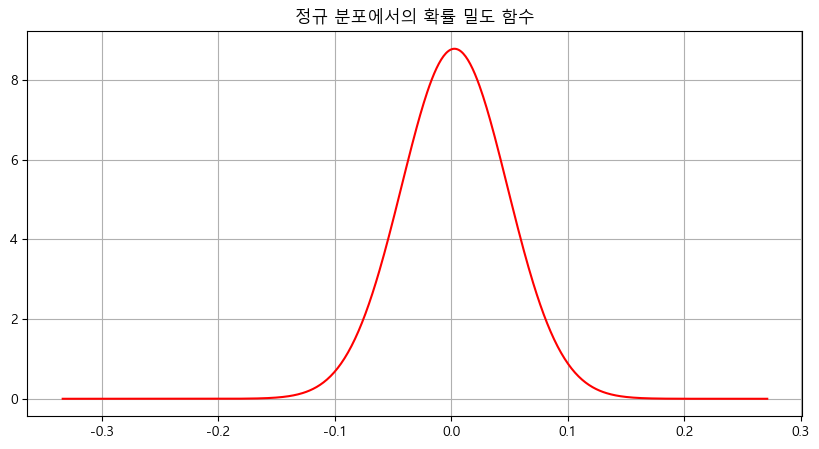

In [39]:
# 정규 분포의 확률 밀도 함수(PDF)를 시각화합니다.
# denApp 데이터프레임의 'x' 값에 대해 'pdf' 값을 플로팅합니다.
plt.plot(denApp['x'], denApp['pdf'], color='red')

plt.grid() 
plt.title("정규 분포에서의 확률 밀도 함수")
plt.show() 

### 어떤 주식이 하루에 x% 이상 하락할 확률 계산

- 누적 분포 함수(Cumulative distribution function, cdf)는 주어진 특정 값보다 작거나 같은 확률을 나타내는 함수이다.   
 

- `norm.cdf` 함수는 누적 분포 함수(cumulative distribution function)를 나타내며, 특정 값 이하의 확률을 반환.  
    - 사용 방법 - norm.cdf(x, mu, sigma) --> Probability
    - x : 누적 확률을 계산할 값. 이 값은 정규 분포에서 어떤 값보다 작거나 같은 확률을 알고 싶을 때 지정.

예) 하루 5% 이상 하락할 확률 $\rightarrow$  -0.05 이하의 값이 나올 확률

In [42]:
#예) 평균이 mu이고 표준편차가 sigma인 정규분포에서 -0.05 이하의 값이 나올 확률
prob = norm.cdf(-0.05, mu, sigma)
print(f'평균이 {mu:.3f}이고 표준편차가 {sigma:.3f}일 때 ' + 
          f'-0.05 보다 작거나 같을 확률은 {prob * 100:.2f} % 이다.')

평균이 0.003이고 표준편차가 0.045일 때 -0.05 보다 작거나 같을 확률은 12.26 % 이다.


- 하루에 10% 이상 하락할 확률 $\rightarrow$  -0.1 이하의 값이 나올 확률

In [64]:
prob = norm.cdf(-0.1, mu, sigma)
print('The Probability is {:.2f} %'.format(prob * 100))

The Probability is 1.18 %


- 하루 1% 이상 하락할 확률

In [65]:
prob = norm.cdf(-0.01, mu, sigma)
print('The Probability is {:.10f} %'.format(prob * 100))

The Probability is 38.9060050460 %


위에서 계산한 확률을 시각화

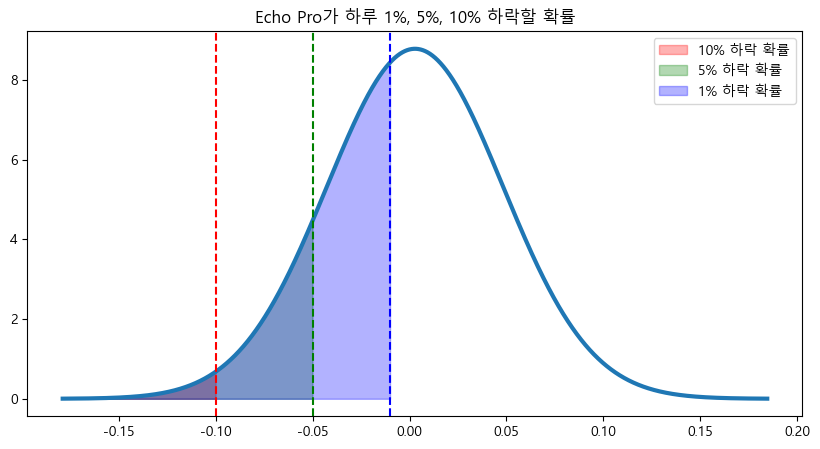

In [67]:
# 평균이 mu이고 표준편차가 sigma인 정규분포 객체를 생성합니다.
iq = norm(mu, sigma)

# mu 주위에 4*sigma 범위의 값을 가진 배열을 생성합니다.
x = np.arange(mu - 4 * sigma, mu + 4 * sigma, 0.00001)

# 확률 밀도 함수를 그립니다.
plt.plot(x, iq.pdf(x), linewidth=3)

# x 축에서 -0.01, -0.05, -0.1 위치에 수직선을 그립니다.
plt.axvline(-0.01, ls='--', color='blue')
plt.axvline(-0.05, ls='--', color='green')
plt.axvline(-0.1, ls='--', color='red')

# 각각의 색상과 투명도를 다르게 설정하여 영역을 채웁니다.

# x 축에서 -0.1 이하의 값을 가진 배열을 생성합니다.
xrange1 = np.arange(x.min(), -0.1, 0.0001)
plt.fill_between(xrange1, y1=norm.pdf(xrange1, mu, sigma), y2=0, color='red', alpha=0.3, label='10% 하락 확률')

# x 축에서 -0.05 이하의 값을 가진 배열을 생성합니다.
xrange2 = np.arange(x.min(), -0.05, 0.0001)
plt.fill_between(xrange2, y1=norm.pdf(xrange2, mu, sigma), y2=0, color='green', alpha=0.3, label='5% 하락 확률')

# x 축에서 -0.01 이하의 값을 가진 배열을 생성합니다.
xrange3 = np.arange(x.min(), -0.01, 0.0001)
plt.fill_between(xrange3, y1=norm.pdf(xrange3, mu, sigma), y2=0, color='blue', alpha=0.3, label='1% 하락 확률')

# 그래프 제목과 범례 추가
plt.title(f"{ticker_name}가 하루 1%, 5%, 10% 하락할 확률")
plt.legend()

# 그래프 출력
plt.show()

### 특정 주식이 일년(220 거래일)에 xx% 이상 하락할 확률 계산

- `mu`가 daily return의 평균이므로 220 거래일의 평균 return 은 $220 \times mu $
- `sigma`가 daily return의 표준편차이므로 220 거래일의 표준편차는 $\sqrt{220} \times \sigma$

- 1년에 xx% 이상 하락할 확률

In [68]:
mu220 = 220 * mu
sigma220 = (220 ** 0.5) * sigma

#평균이 mu220이고 표준편차가 sigma220인 정규분포에서 -0.1 이하의 값이 나올 확률
p = norm.cdf(-0.1, mu220, sigma220)*100
print('1년에 10% 이상 하락할 확률 {:.2f}% '.format(p))

#평균이 mu220이고 표준편차가 sigma220인 정규분포에서 -0.2 이하의 값이 나올 확률
p = norm.cdf(-0.2, mu220, sigma220)*100
print('1년에 20% 이상 하락할 확률 {:.2f}% '.format(p))

#평균이 mu220이고 표준편차가 sigma220인 정규분포에서 -0.3 이하의 값이 나올 확률
p = norm.cdf(-0.4, mu220, sigma220)*100
print('1년에 40% 이상 하락할 확률 {:.2f}%'.format(p))

1년에 10% 이상 하락할 확률 14.37% 
1년에 20% 이상 하락할 확률 11.27% 
1년에 40% 이상 하락할 확률 6.56%


- 어떤 주식이 일년(220 거래일)에 xx% 이상 하락할 확률 확률 시각화

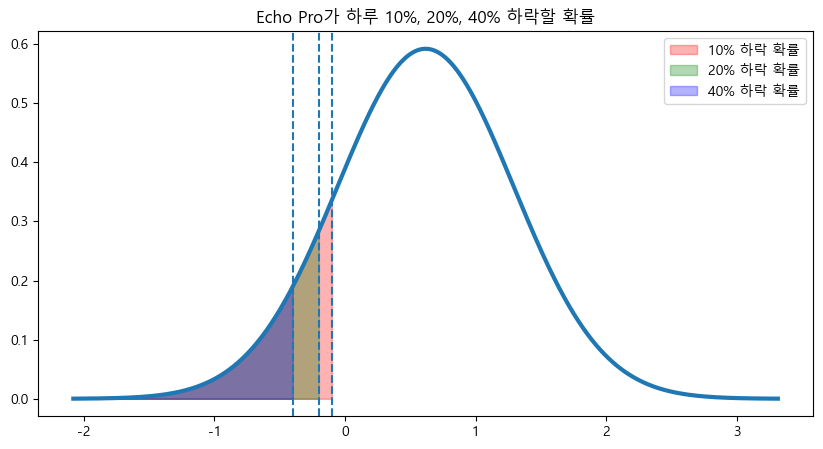

In [71]:
# 평균이 mu220이고 표준편차가 sigma220인 정규분포 객체를 생성합니다.
iq = norm(mu220, sigma220)

# mu220 주위에 4*sigma220 범위의 값을 가진 배열을 생성합니다.
x = np.arange(mu220 - 4*sigma220, mu220 + 4*sigma220, 0.00001)

# 확률 밀도 함수를 그립니다.
plt.plot(x, iq.pdf(x), linewidth=3)

# x 축에서 -0.1, -0.2, -0.4 위치에 수직선을 그립니다.
plt.axvline(-0.1, ls='--')
plt.axvline(-0.2, ls='--')
plt.axvline(-0.4, ls='--')

# 각각의 색상과 투명도를 다르게 설정하여 영역을 채웁니다.

# x 축에서 -0.1 이하의 값을 가진 배열을 생성합니다.
xrange1 = np.arange(x.min(), -0.1, 0.0001)
plt.fill_between(xrange1, y1=norm.pdf(xrange1, mu220, sigma220), y2=0, color='red', alpha=0.3, label='10% 하락 확률')

# x 축에서 -0.05 이하의 값을 가진 배열을 생성합니다.
xrange2 = np.arange(x.min(), -0.2, 0.0001)
plt.fill_between(xrange2, y1=norm.pdf(xrange2, mu220, sigma220), y2=0, color='green', alpha=0.3, label='20% 하락 확률')

# x 축에서 -0.01 이하의 값을 가진 배열을 생성합니다.
xrange3 = np.arange(x.min(), -0.4, 0.0001)
plt.fill_between(xrange3, y1=norm.pdf(xrange3, mu220, sigma220), y2=0, color='blue', alpha=0.3, label='40% 하락 확률')

# 그래프 제목과 범례 추가
plt.title(f"{ticker_name}가 하루 10%, 20%, 40% 하락할 확률")
plt.legend()

# 그래프 출력
plt.show()

## Value at risk (VaR, 위험 가치) 계산
- 발생 가능 최대 손실 : 투자 손실의 위험 표시

- 일일 수익률의 5% 분위수(quantile)를 95% VaR 또는 95% 수준의 VaR이라고 합니다.   
$\rightarrow$  '95% 확률로 우리의 일일 수익률 손실이 이 VaR 값 이하일 것'이라는 의미. 동시에 이 값을 초과하여 손실이 발생할 확률이 5% 라는 의미. 다시 말해, "5%의 확률로 발생할 수 있는 최대 손실"을 의미.

**VaR = norm.ppf(significance_level, mu, sigma)**
```
norm.cdf(x, mu, sigma)는 주어진 값 x 이하의 확률을 반환합니다.
입력: x 값
출력: x 이하의 누적 확률

norm.ppf(significance_level, mu, sigma)는 주어진 누적 확률에 해당하는 값을 반환합니다.
입력: 누적 확률 (유의 수준)
출력: 해당 확률에 대응하는 x 값
```

In [73]:
# 95% 수준의 VaR 구하기
significance_level = 0.05  # 유의 수준 설정 (5% 확률)
VaR = norm.ppf(significance_level, mu, sigma)  # 유의 수준에 해당하는 VaR 값 계산

# 평균 수익률(mu)과 변동성(sigma)을 기준으로, 유의 수준(5%)에서 VaR를 계산
# 이 주식이 5% 확률로 일일 수익률이 VaR 값보다 나쁠 수 있다는 의미
print('평균 수익률 {:.5f}, 변동성 {:.5f} 인 주식은 {}%의 확률로 daily return 이 {:.3f} 보다 나쁠 수 있다. '
          .format(mu, sigma, significance_level*100, VaR))  

평균 수익률 0.00281, 변동성 0.04545 인 주식은 5.0%의 확률로 daily return 이 -0.072 보다 나쁠 수 있다. 


유의 수준(가능성)을 1%로 낮추면 VaR 증가

In [76]:
# 10% 수준의 VaR 구하기
significance_level = 0.01  # 유의 수준 설정 (1% 확률)
VaR = norm.ppf(significance_level, mu, sigma)  # 유의 수준에 해당하는 VaR 값 계산

# 1% 확률로 주식의 일일 수익률이 VaR 값보다 낮을 수 있음을 의미
print('평균 수익률 {:.5f}, 변동성 {:.5f} 인 주식은 {}%의 확률로 daily return 이 {:.3f} 보다 나쁠 수 있다. '
          .format(mu, sigma, significance_level*100, VaR))  

평균 수익률 0.00281, 변동성 0.04545 인 주식은 1.0%의 확률로 daily return 이 -0.103 보다 나쁠 수 있다. 
